<a href="https://colab.research.google.com/github/djbrady/CNNprocessing/blob/main/simulations/diffuseTargetPtychography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Illumination Strategies
## David Brady
## University of Arizona
## October 2021

This notebook considers illumination strategies for coherent imaging.

### Python Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.data import shepp_logan_phantom, camera
from skimage.filters import gaussian
from google.colab import files
plt.rcParams.update({'font.size': 22})
from google.colab import drive
import io

In [7]:
drive.mount('drive')

Mounted at drive


## System Description

We consider a diffuse object illuminated by structured laser patterns. For simplicity, we begin with uniform illumination. We observe the object from an array of cameras. The lateral position of the $i^{th}$ camera is $\Delta_i$, leading to a phase modulation on the image detected by this camera of $2\pi u_ix$, where $u_i=\frac{\Delta_i}{\lambda z}$, $z$ being the target range. The detected signal is
$$
g_i(x)=\left |\int f(x) e^{i\phi(x)}e^{i2\pi u_ix}h(x'-x)dx\right |^2
$$
where $\phi(x)$ is the random phase associated with diffuse reflection and $f(x)$ is the intensity reflectance. We assume $f(x)$ and 
$e^{i2\pi u_ix}$ are slowly varying in comparison to $\phi(x)$. 

## Example images

Below we  see examples of experimental images.

In [ ]:
imgs=np.load('drive/MyDrive/Research/arrayCameraPtychography/speckle_data/sample0/16imgs.npy')

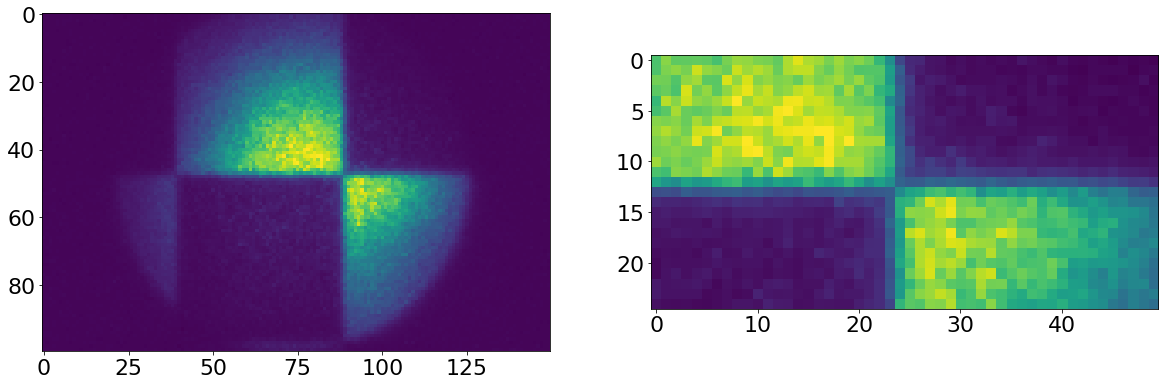

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.imshow(imgs[0,,650:750,850:1000])
plt.subplot(1,2,2)
plt.imshow(imgs[0,0,685:710,915:965])

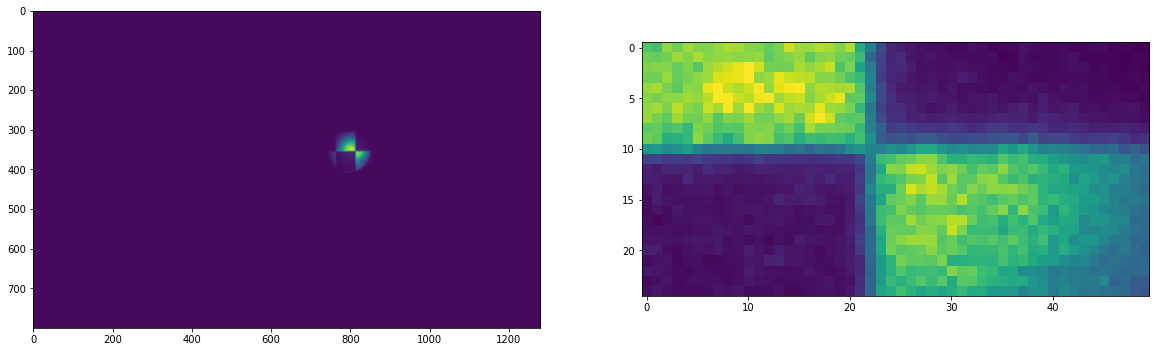

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.imshow(imgs[0,5,:,:])
plt.subplot(1,2,2)
plt.imshow(imgs[0,5,345:370,790:840])

### images of the same object from several different cameras


notice the change in the speckle pattern from different perspectives.

(-0.5, 49.5, 24.5, -0.5)

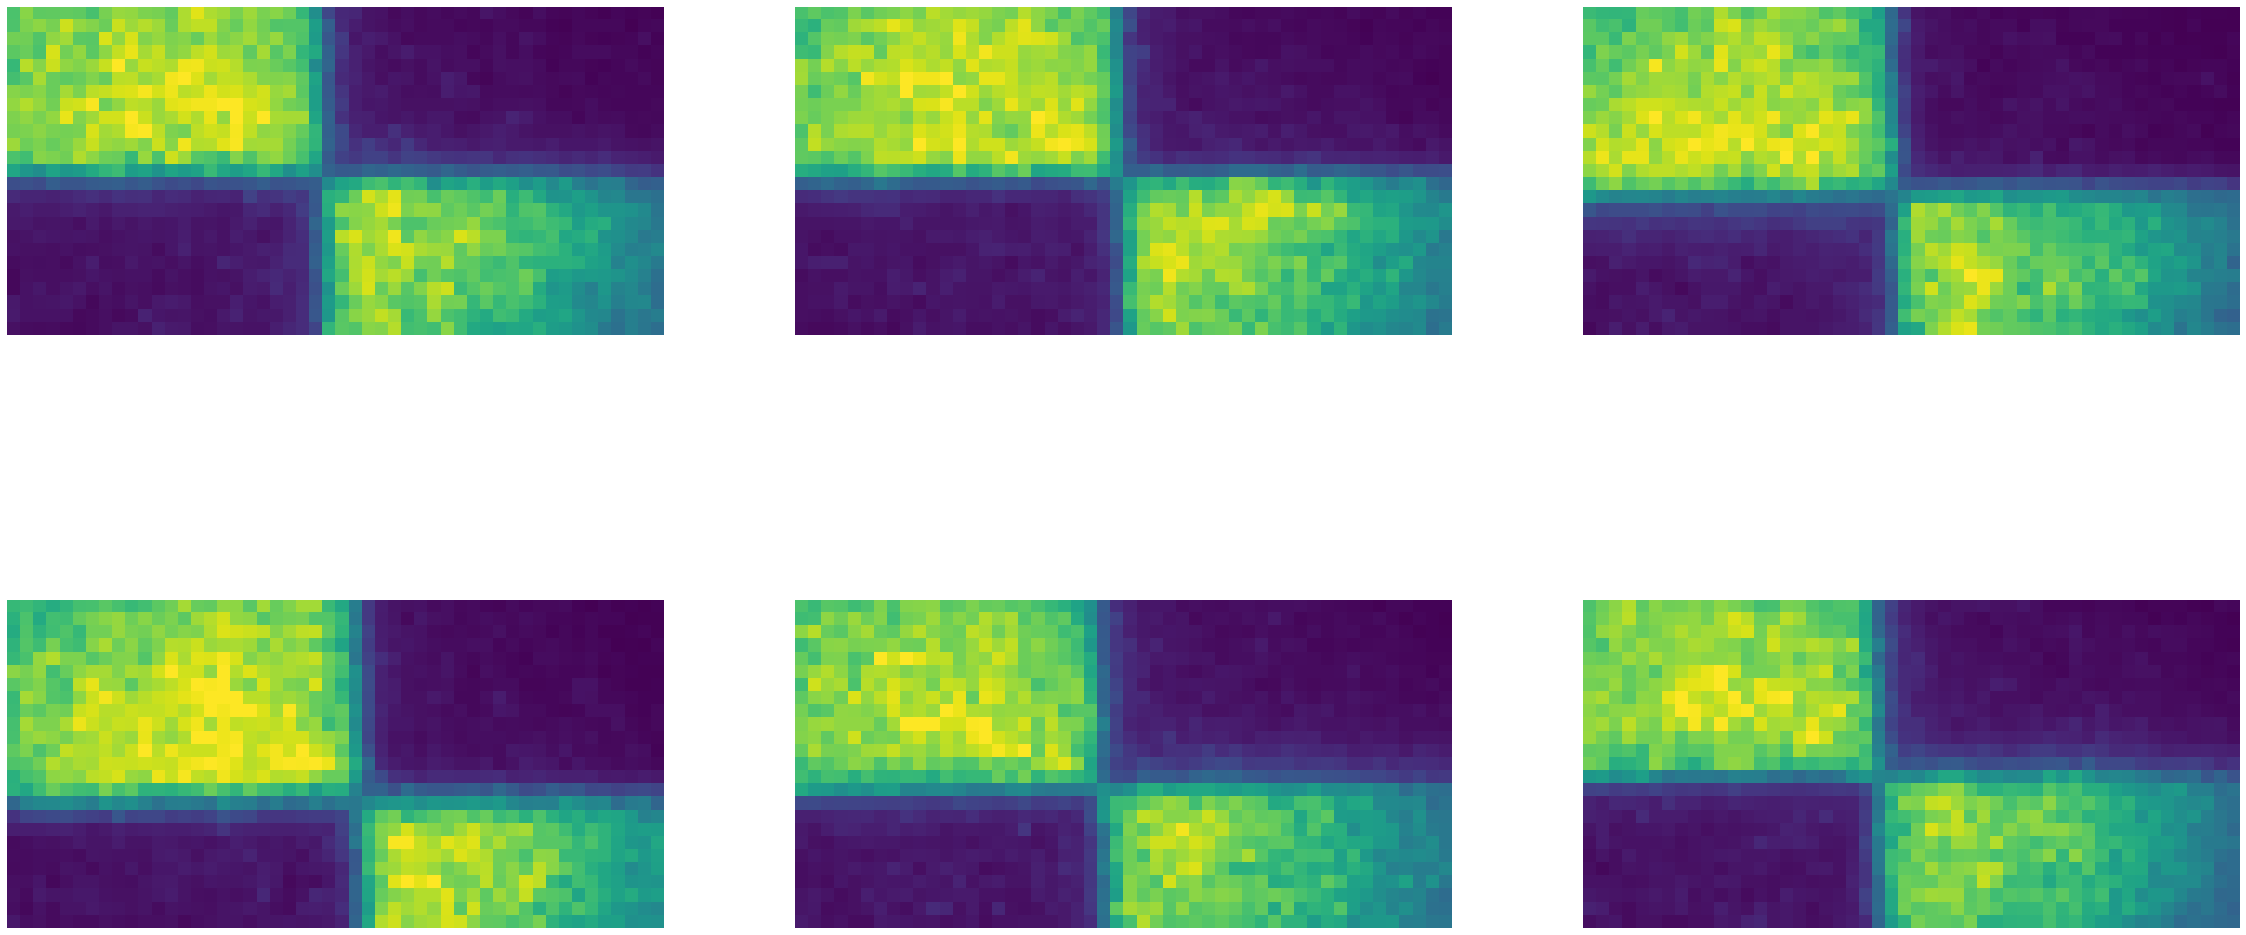

In [ ]:
plt.figure(figsize=[40,20])
plt.subplot(2,3,1)
plt.imshow(imgs[0,0,685:710,915:965])
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(imgs[0,1,719:744,705:755])
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(imgs[0,2,690:715,565:615])
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow(imgs[0,3,745:770,330:380])
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(imgs[0,4,425:450,952:1002])
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(imgs[0,5,342:367,790:840])
plt.axis('off')

In [ ]:
imgs1=np.load('drive/MyDrive/Research/arrayCameraPtychography/speckle_data/sample1/16imgs.npy')

(-0.5, 49.5, 24.5, -0.5)

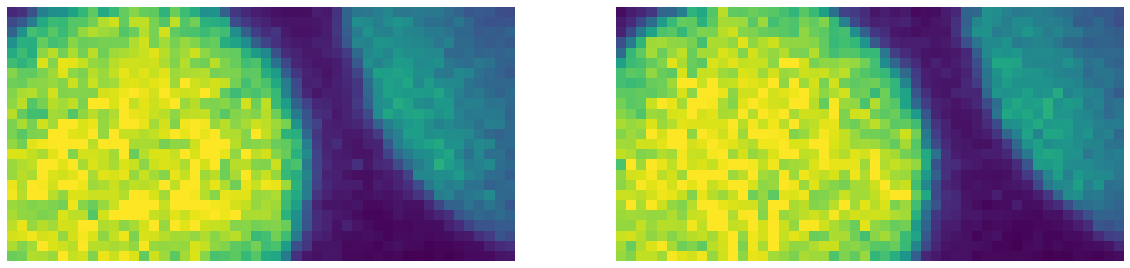

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.imshow(imgs1[0,0,685:710,915:965])
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(imgs1[0,1,719:744,705:755])
plt.axis('off')

## Simulations

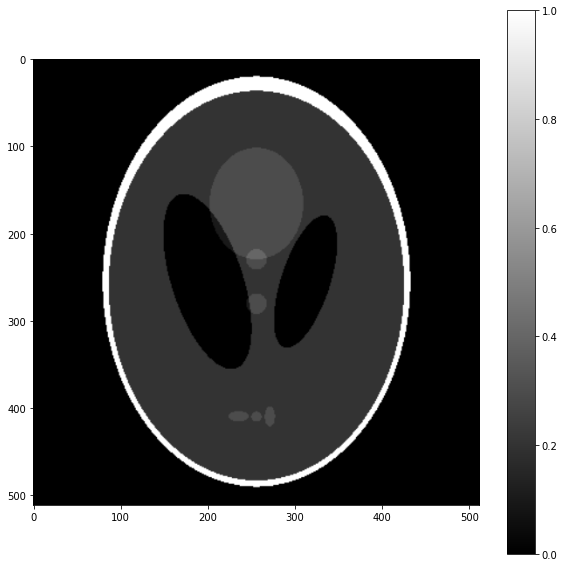

In [ ]:
test=shepp_logan_phantom()
test=cv2.resize(test,(512,512))
plt.figure(figsize=[10,10])
plt.imshow(test)
plt.colorbar()

In [ ]:
np.max(test)

1.0

### phase mask

assume that each point on the scene has a random reflection phase


In [ ]:
phaseMask=np.exp(2*np.pi*1j*np.random.random((512,512)))

### simulated image

let's assume that the the PSF is a Gaussian filter with deviation equal to 3 pixels. Suppose that $x$ is in units of $\lambda$, so the discrete frequency $u$ is units of $\Delta /F$, fractions of a focal length moved. 

In [ ]:
def g(f, Delta):
  xrange=np.linspace(-256,256,512)
  x,y=np.meshgrid(xrange,xrange)
  g=phaseMask*f*np.exp(2*np.pi*1j*Delta*x)
  g=gaussian(np.real(g),3)+1j*gaussian(np.imag(g),3)
  g=np.abs(g)**2
  return g

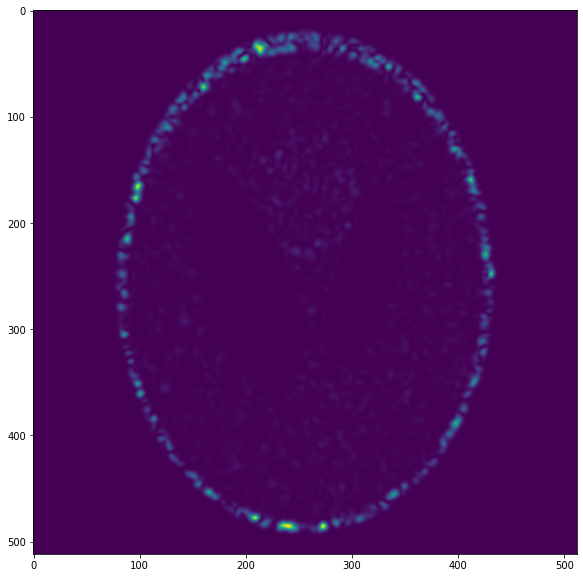

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(g(test,0))



(-0.5, 511.5, 511.5, -0.5)

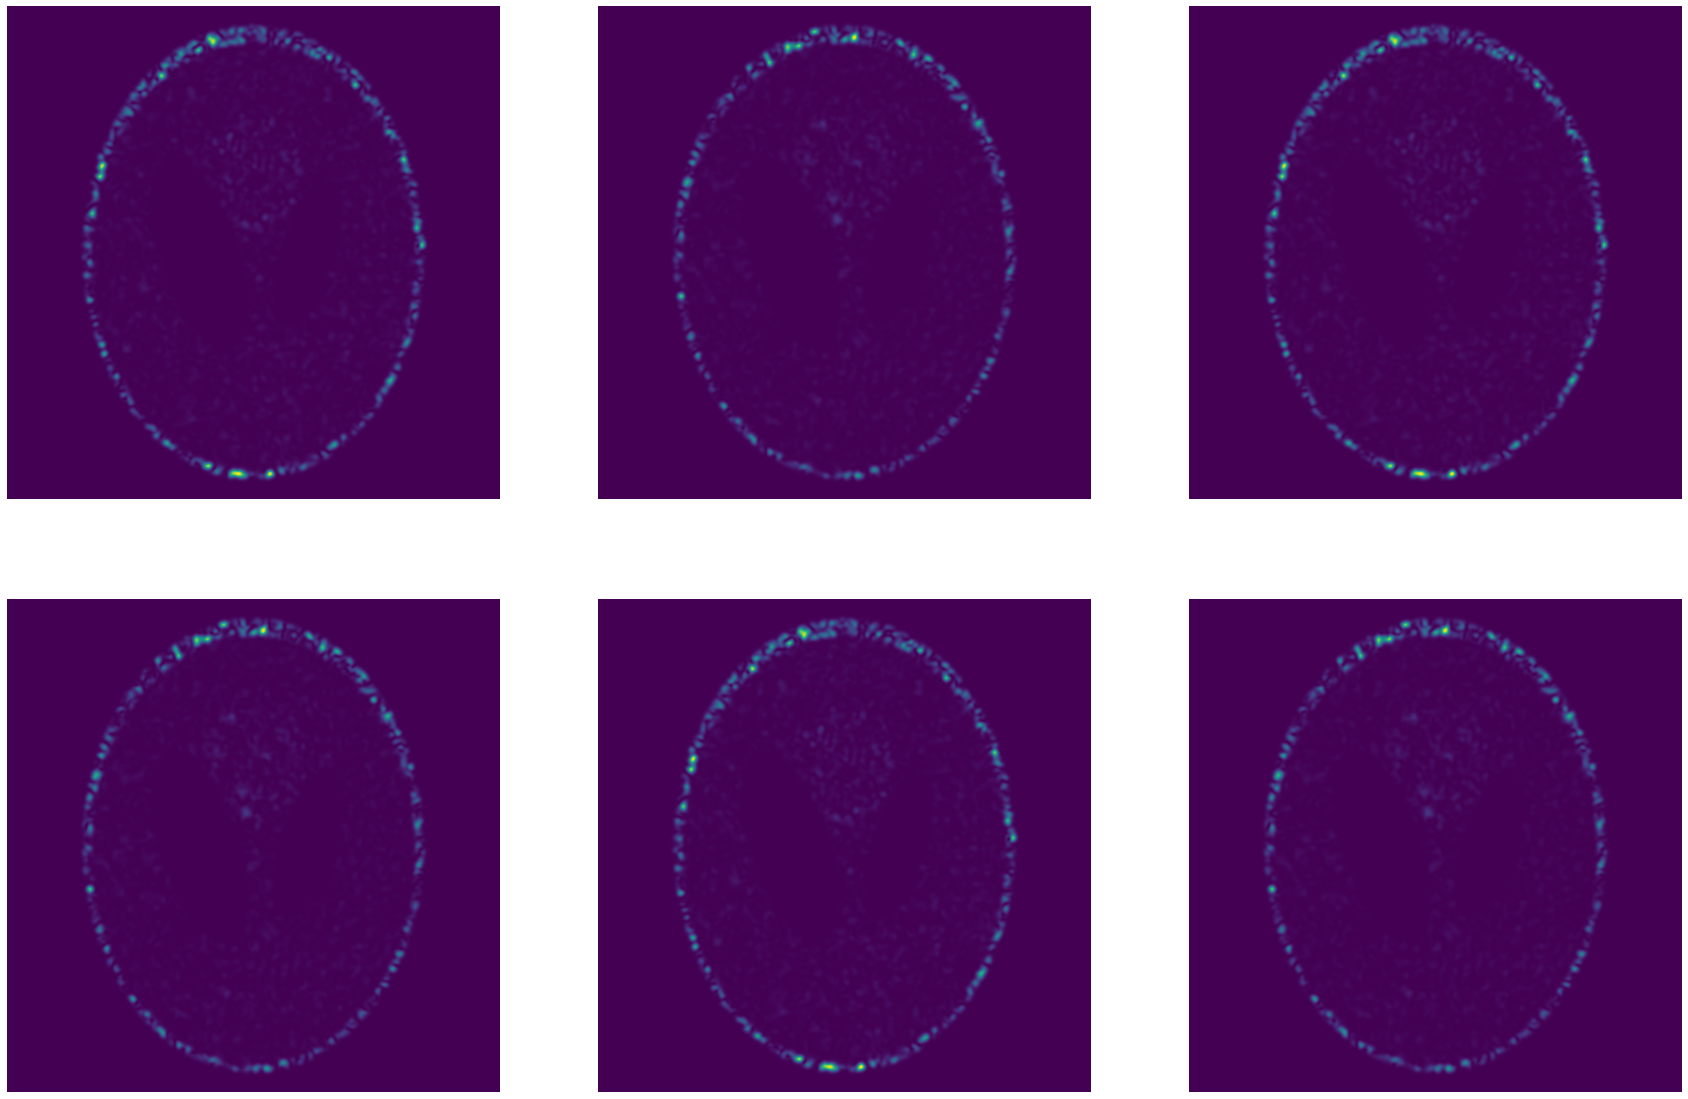

In [ ]:
plt.figure(figsize=[30,20])
plt.subplot(2,3,1)
plt.imshow(g(test,0))
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(g(test,.5))
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(g(test,1))
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow(g(test,1.5))
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(g(test,2))
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(g(test,2.5))
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

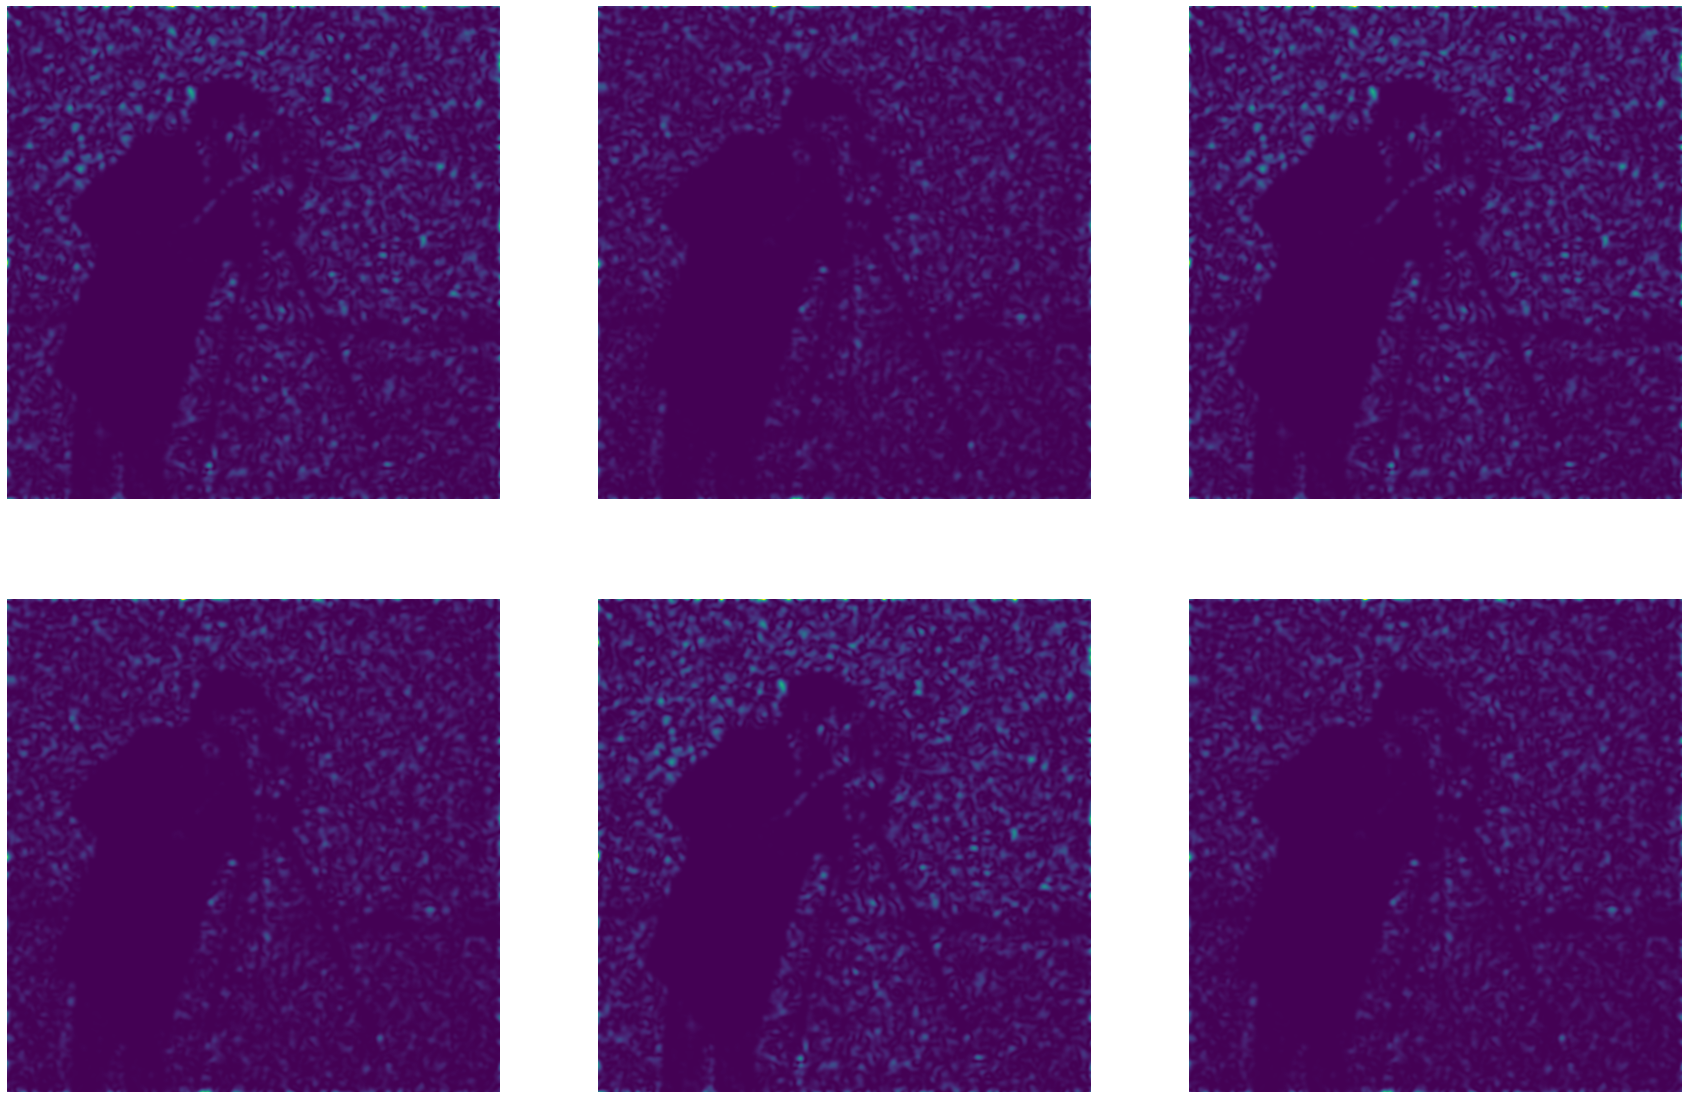

In [ ]:
test=camera()/np.max(camera())
plt.figure(figsize=[30,20])
plt.subplot(2,3,1)
plt.imshow(g(test,0))
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(g(test,.5))
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(g(test,1))
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow(g(test,1.5))
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(g(test,2))
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(g(test,2.5))
plt.axis('off')

In [ ]:
np.max(g(test,2.5))

0.04474037422878433

## targets at 3 meter range

In [11]:
imgs=np.load('drive/MyDrive/Research/arrayCameraPtychography/speckle_data/laser_illumination_4cam.npy')

In [12]:
imgs.shape

(4, 100, 150, 150)

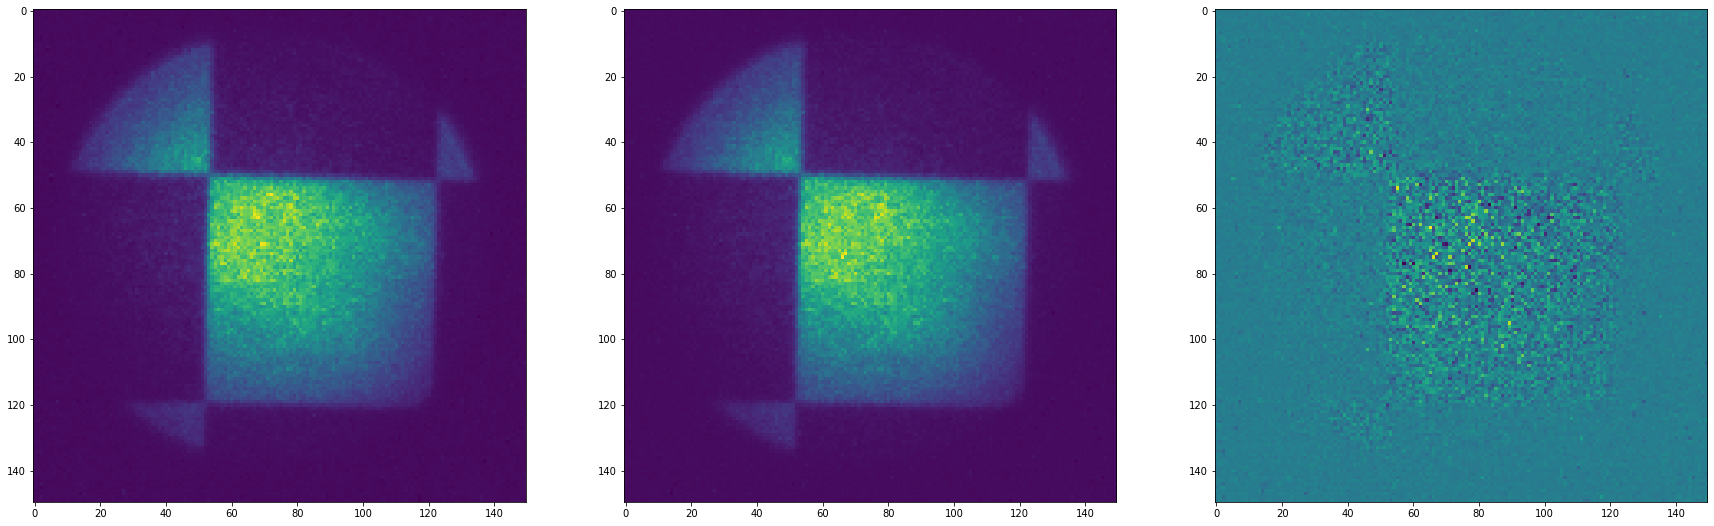

In [46]:
plt.figure(figsize=[30,10])
plt.subplot(1,3,1)
plt.imshow(imgs[0,0,:,:])
plt.subplot(1,3,2)
plt.imshow(imgs[0,1,:,:])
plt.subplot(1,3,3)
plt.imshow(imgs[0,1,:,:]-imgs[0,0,:,:])

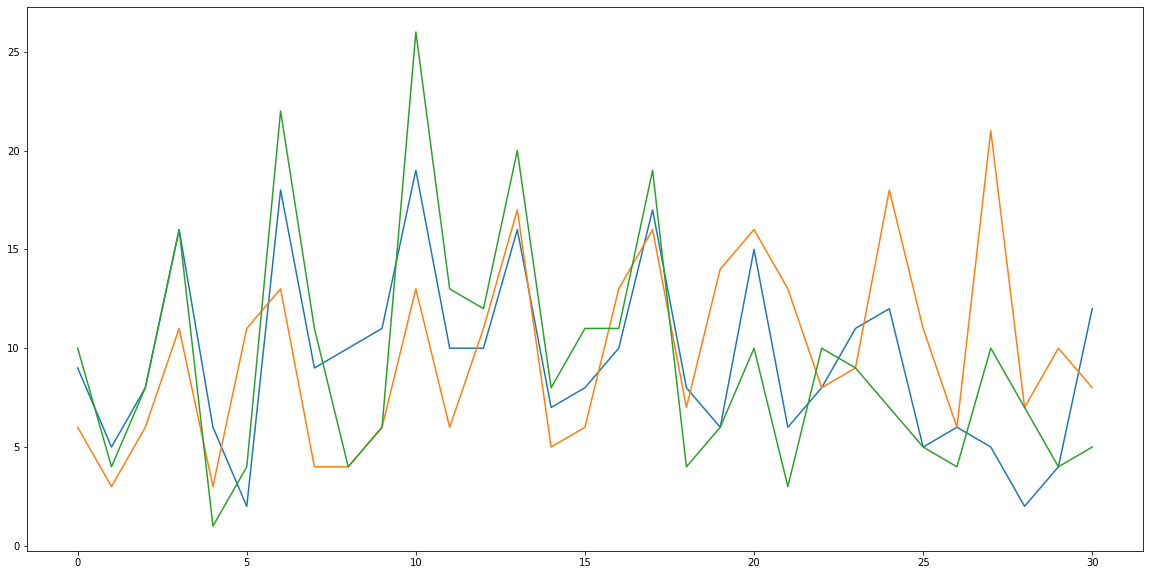

In [96]:
plt.figure(figsize=[20,10])
a=imgs[0,0,60:80,60:80]-imgs[0,1,60:80,60:80]
pop1=np.histogram(a,bins=np.linspace(-20,20,32))
a=imgs[0,0,60:80,60:80]-imgs[0,2,60:80,60:80]
pop2=np.histogram(a,bins=np.linspace(-20,20,32))
a=imgs[0,0,60:80,60:80]-imgs[0,3,60:80,60:80]
pop3=np.histogram(a,bins=np.linspace(-20,20,32))
plt.plot(pop1[0])
plt.plot(pop2[0])
plt.plot(pop3[0])

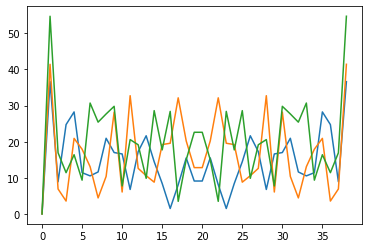

In [94]:
plt.plot(np.abs(np.fft.fft(pop1[0]-np.mean(pop1[0]))))
plt.plot(np.abs(np.fft.fft(pop2[0]-np.mean(pop2[0]))))
plt.plot(np.abs(np.fft.fft(pop3[0]-np.mean(pop3[0]))))

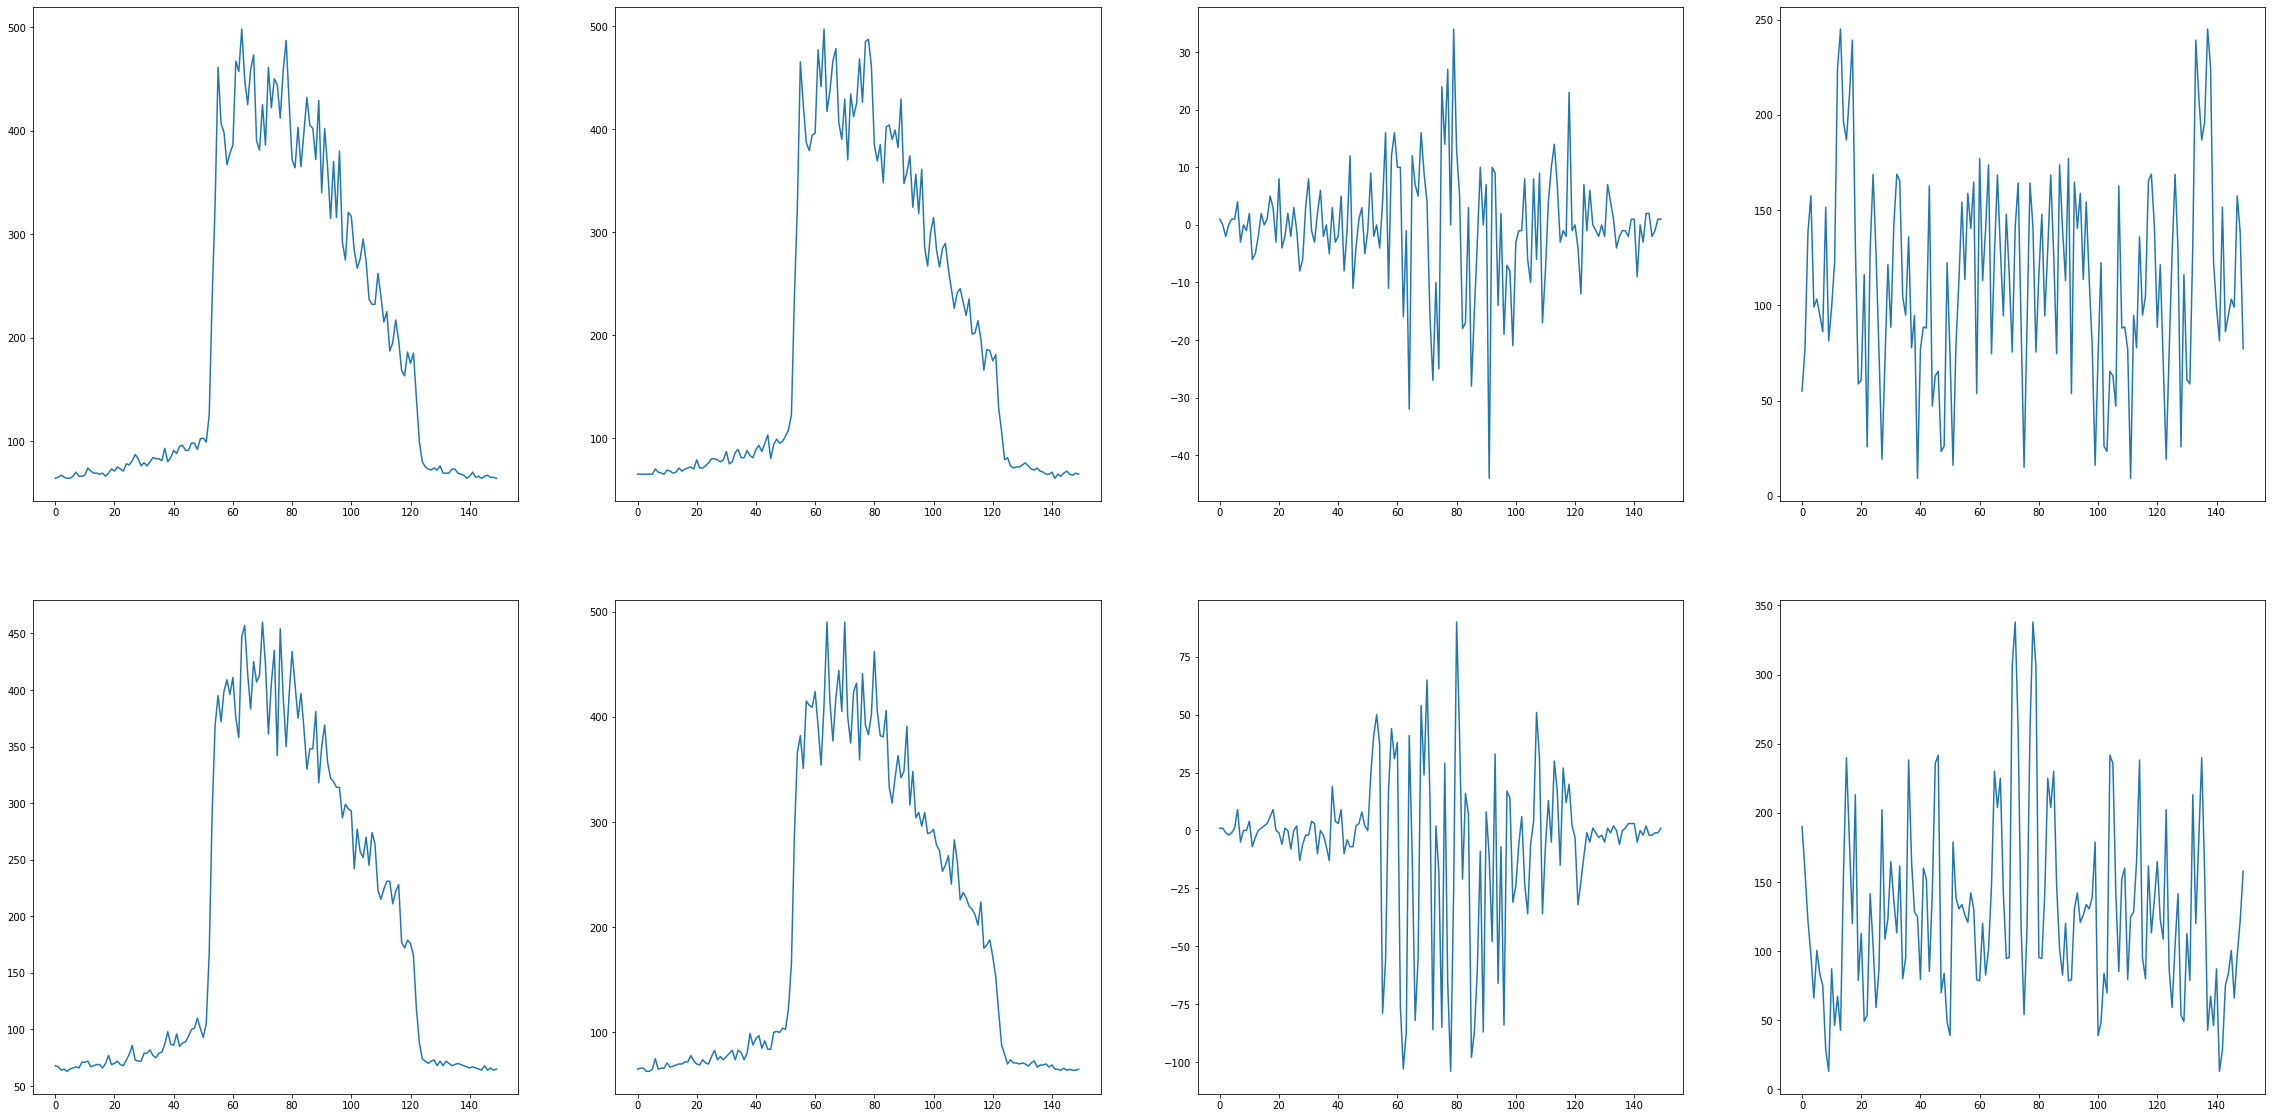

In [23]:
plt.figure(figsize=[40,20])
plt.subplot(2,4,1)
plt.plot(imgs[0,0,60,:])
plt.subplot(2,4,2)
plt.plot(imgs[0,1,60,:])
plt.subplot(2,4,3)
plt.plot(imgs[0,1,60,:]-imgs[0,0,60,:])
plt.subplot(2,4,4)
plt.plot(np.abs(np.fft.fft(imgs[0,1,60,:]-imgs[0,0,60,:])))
plt.subplot(2,4,5)
plt.plot(imgs[0,0,80,:])
plt.subplot(2,4,6)
plt.plot(imgs[0,1,80,:])
plt.subplot(2,4,7)
plt.plot(imgs[0,1,80,:]-imgs[0,0,60,:])
plt.subplot(2,4,8)
plt.plot(np.abs(np.fft.fft(imgs[0,1,80,:]-imgs[0,0,80,:])))

In [30]:
from scipy.signal import convolve2d

In [41]:
pip=correlate(imgs[0,0,:,:]-np.mean(imgs[0,0,:,:]),imgs[0,2,:,:]-np.mean(imgs[0,2,:,:]))

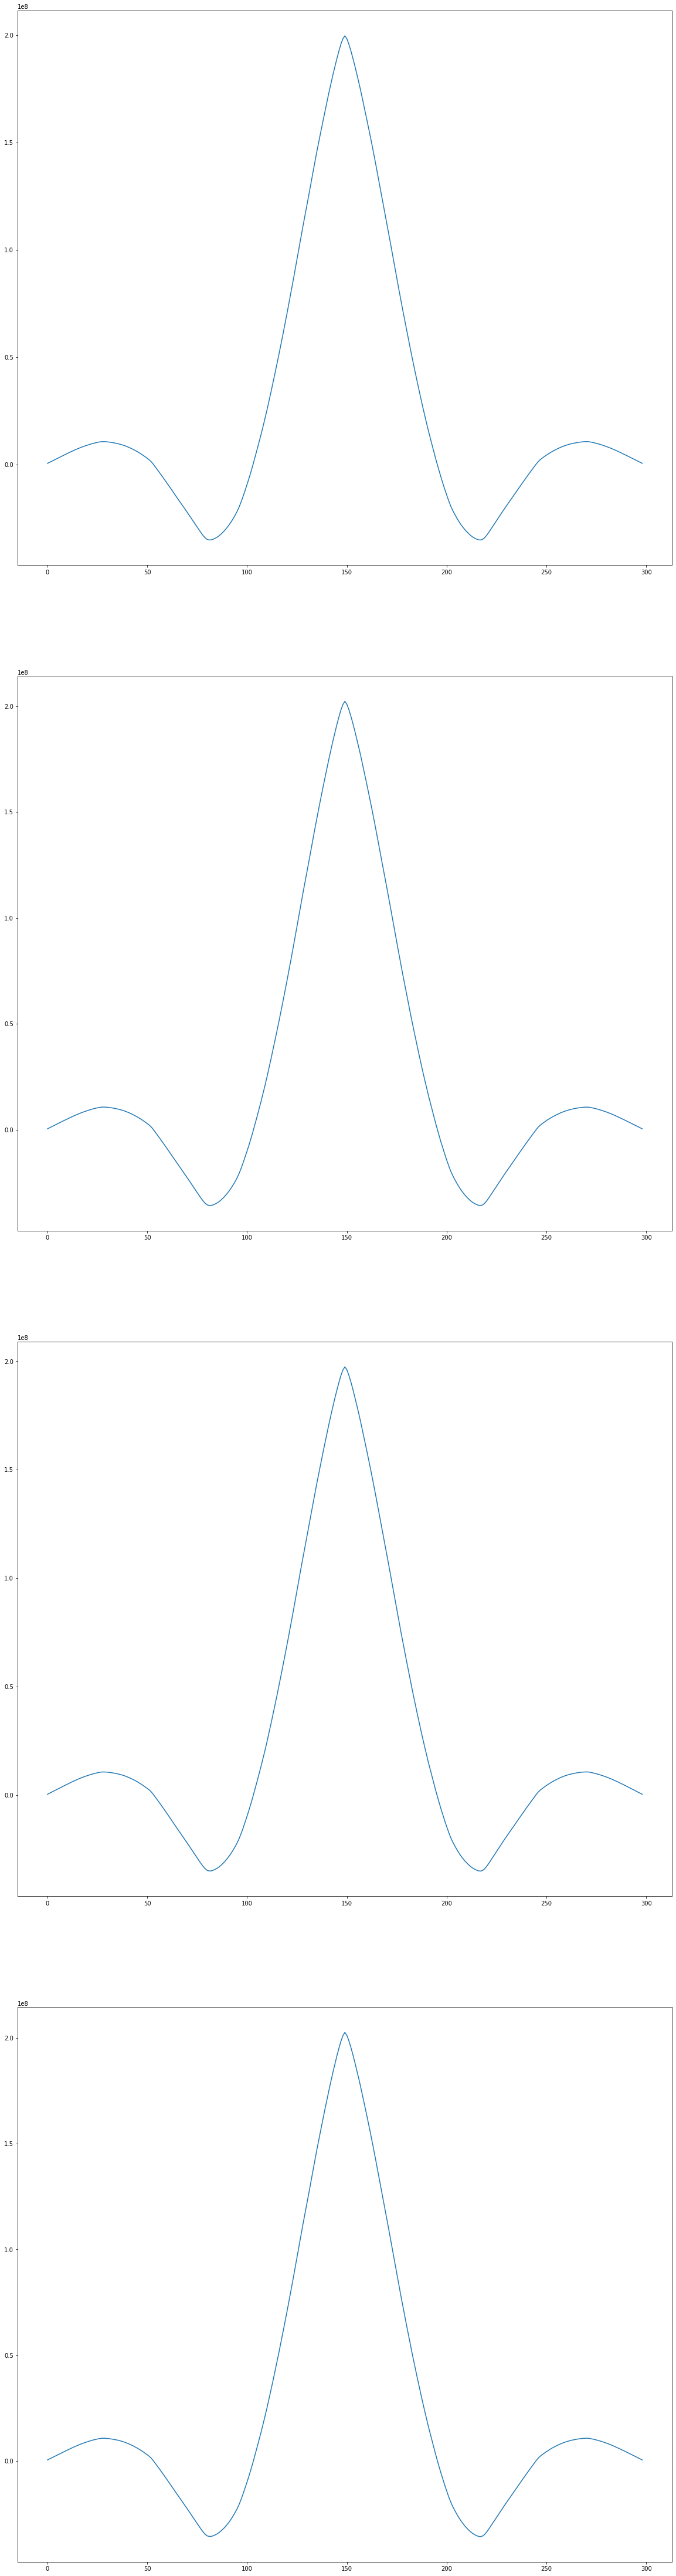

In [44]:
plt.figure(figsize=[20,80])
plt.subplot(4,1,1)
plt.plot(correlate(imgs[0,0,:,:]-np.mean(imgs[0,0,:,:]),imgs[0,0,:,:]-np.mean(imgs[0,0,:,:]))[150,:])
plt.subplot(4,1,2)
plt.plot(correlate(imgs[0,0,:,:]-np.mean(imgs[0,0,:,:]),imgs[0,1,:,:]-np.mean(imgs[0,1,:,:]))[150,:])
plt.subplot(4,1,3)
plt.plot(correlate(imgs[0,0,:,:]-np.mean(imgs[0,0,:,:]),imgs[0,2,:,:]-np.mean(imgs[0,1,:,:]))[150,:])
plt.subplot(4,1,4)
plt.plot(correlate(imgs[0,0,:,:]-np.mean(imgs[0,0,:,:]),imgs[0,3,:,:]-np.mean(imgs[0,3,:,:]))[150,:])

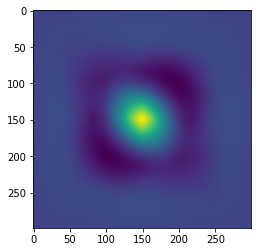

In [38]:
plt.imshow(pip)

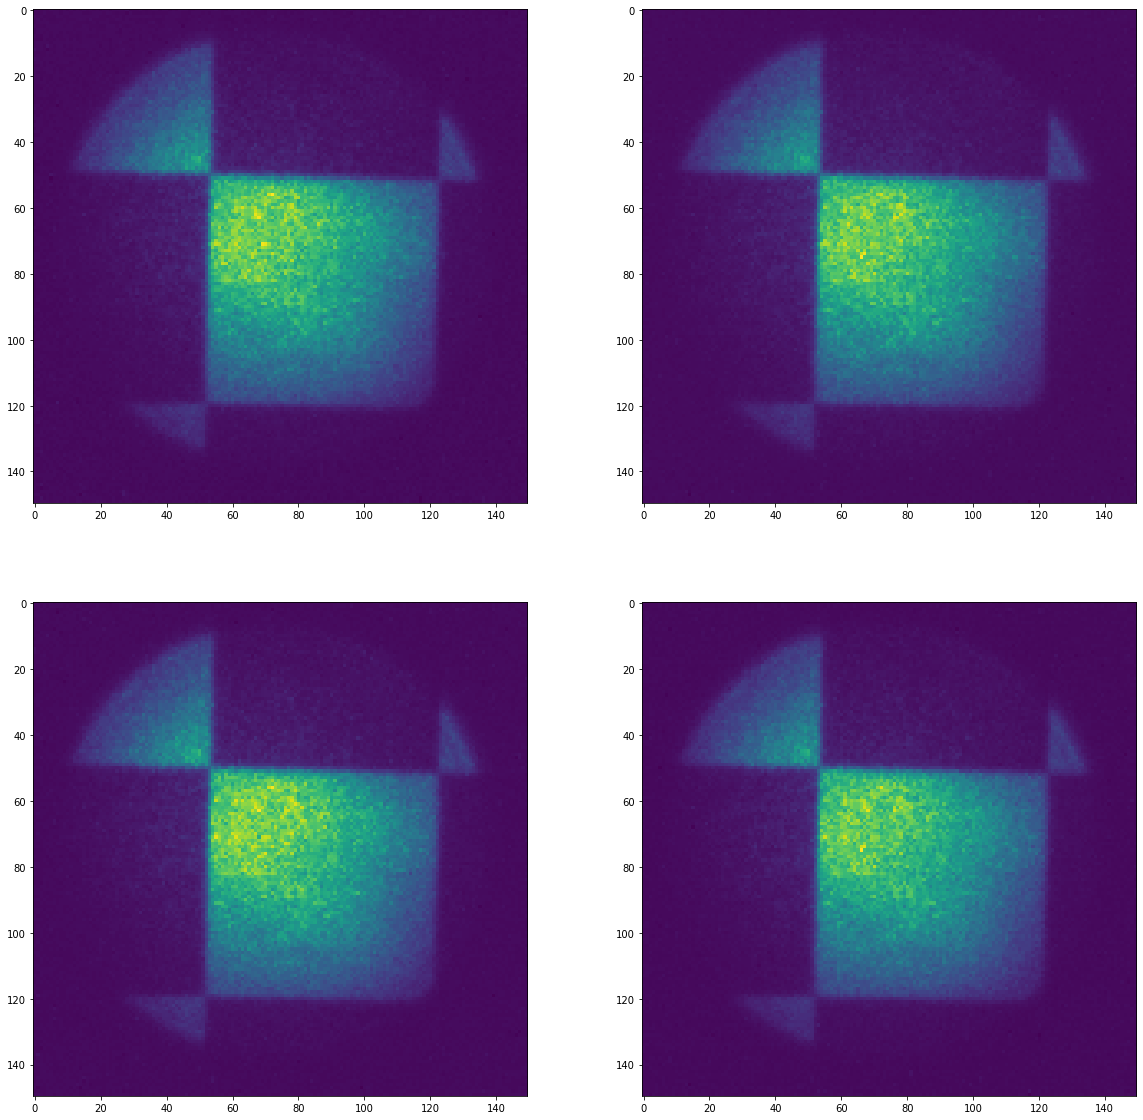

In [45]:
plt.figure(figsize=[20,20])
plt.subplot(2,2,1)
plt.imshow(imgs[0,0,:,:])
plt.subplot(2,2,2)
plt.imshow(imgs[0,1,:,:])
plt.subplot(2,2,3)
plt.imshow(imgs[0,2,:,:])
plt.subplot(2,2,4)
plt.imshow(imgs[0,3,:,:])